In [157]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [227]:
# do not show scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)

# Welcome to Home Price Prediction Application: A Capstone Project

This application allows users to predict home prices by modifying common features such as number of bedrooms or bathrooms, location, square feet, number of balconies, and acreage. Underneath the application is a machine learning algorithm - linear regression - that takes in inputs and spits out results. At the bottom of this page, you will see the interactive widget, with which you will be able to modify parameters to predict home prices. 

### A Preview of Data

In [497]:
df1 = pd.read_csv('realtor-data.csv')

In [498]:
df2 = df1.dropna()

In [499]:
# calculate price per sq feet 
df2['price_per_sqft'] = df2['price']/df3['total_sqft']
df2.head()  

,price,size,bath,balcony,acre_lot,location,total_sqft,price_per_sqft
0,149000,3.00000,2.00000,1,1.26000,Abbot,1792.00000,83.14732
1,425000,4.00000,2.00000,1,91.00000,Abbot,1600.00000,265.62500
5,425000,4.00000,2.00000,0,91.00000,Abbot,1600.00000,265.62500
11,495000,3.00000,4.00000,2,0.16000,Aberdeen,2146.00000,230.66170
13,499900,4.00000,3.00000,1,0.10000,Aberdeen,2165.00000,230.90069


In [474]:
# calculate number of rows per location
location_n = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [475]:
# how many locations that have 100 or less rows
location_n_le_100 = location_n[location_n <= 100]

In [476]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_n_le_100 else x)

In [477]:
# remove duplicates
df3 = df2.drop_duplicates(keep = 'first')

### Summary Statistics

In [478]:
df3.describe()

,price,size,bath,balcony,acre_lot,total_sqft,price_per_sqft
count,81514.00000,81514.00000,81514.00000,81514.00000,81514.00000,81514.00000,81514.00000
mean,857942.70101,3.87778,2.81377,1.11863,11.32885,2553.58748,331.30138
std,1636453.82740,2.12356,2.22321,1.61341,730.34480,5790.28494,319.25804
min,3900.00000,1.00000,1.00000,0.00000,0.00000,122.00000,1.22454
25%,299900.00000,3.00000,2.00000,0.00000,0.13000,1368.00000,172.91667
50%,489000.00000,3.00000,2.00000,1.00000,0.30000,1980.00000,253.60152
75%,825000.00000,4.00000,3.00000,2.00000,0.98000,2908.75000,375.38396
max,100000000.00000,99.00000,198.00000,99.00000,100000.00000,1450112.00000,9807.25624


In [392]:
def remove_outliers(dat, col):
    sum_stats = pd.DataFrame(dat.describe())
    mean = sum_stats.loc['mean', col]
    sd = sum_stats.loc['std', col]
    new_dat = dat[~((dat[col] >= mean+3*sd) | (dat[col] <= mean-3*sd))]
    return new_dat

In [433]:
df4 = remove_outliers(df3, 'price_per_sqft')

In [435]:
def price_per_sqft_recode(x):
    if x >= 1000:
        return 1000
    elif x <= 999 and x >= 331.301382:
        return 330
    elif x >= 100 and x <331.301382:
        return 100
    else:
        return 50

    
def recode(x):
    if x >= 1000:
        return '>=1000'
    elif x <= 999 and x >= 331.301382:
        return '330-999'
    elif x >= 100 and x < 331.301382:
        return '100-329'
    else:
        return '<=99'
    
df4['price_sqft_cat']= df4['price_per_sqft'].apply(price_per_sqft_recode)
df4['price_sqft_cat2'] = df4['price_per_sqft'].apply(recode)

### Bar Chart 
This bar chart illustrates the distribution of homes based on price per square foot. As can be seen, most homes cost less than 329 dollars per square foot, and a quarter of the homes cost between 330 and 1000 dollars per square foot. 

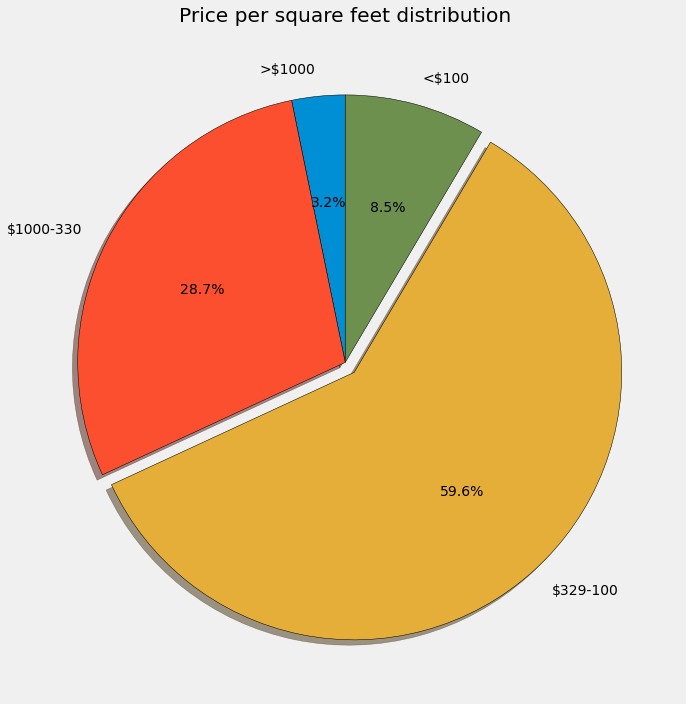

In [479]:
plt.style.use('fivethirtyeight')
slices = [2545,22702, 47165, 6734]
labels=[">$1000", "$1000-330", "$329-100", "<$100"]
explode = [0, 0, 0.05, 0]
plt.pie(slices, labels=labels, 
        wedgeprops={'edgecolor':'black'}, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Price per square feet distribution')
plt.tight_layout()
plt.show()

### Histogram
This histogram provides an alternative view of the distribution of homes based on price per square foot.  As can be seen, price per square foot is not normally distributed because most homes are clustered around the lower end of the scale.  This is consistent with the insight from the bar chart. 

(array([ 596., 1232., 2291., 3207., 3769., 4853., 3694., 2702., 1937.,
        1617., 1305., 1067.,  908.,  737.,  606.,  523.,  498.,  340.,
         367.]),
 array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
         600,  650,  700,  750,  800,  850,  900,  950, 1000]),
 <BarContainer object of 19 artists>)

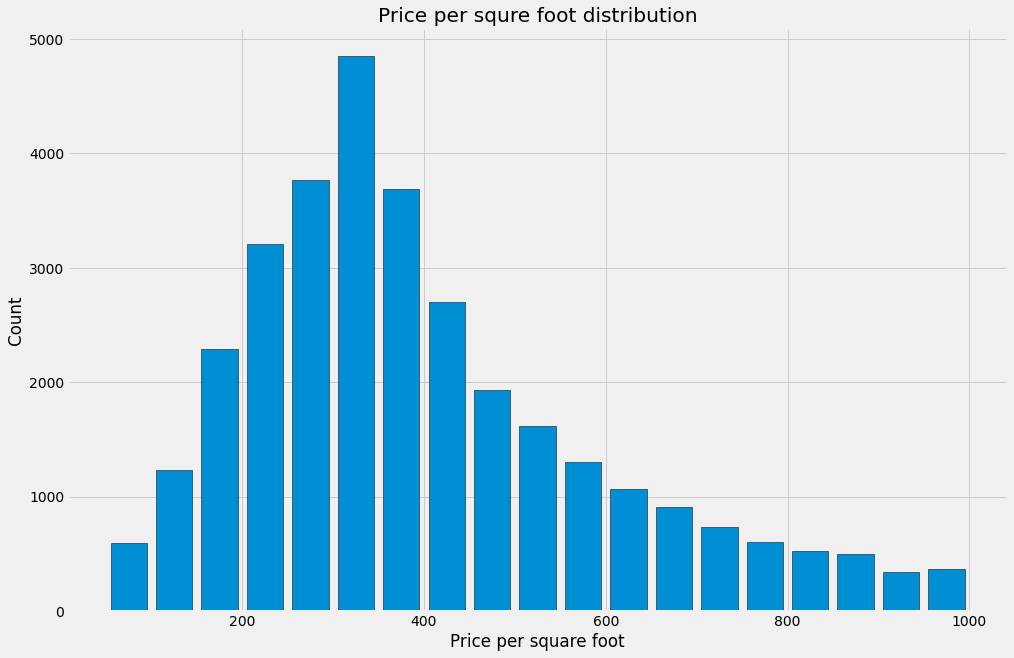

In [480]:
bins=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
plt.title('Price per squre foot distribution')
plt.xlabel("Price per square foot")
plt.ylabel("Count")
plt.hist(df6.price_per_sqft, bins=bins, edgecolor='black', rwidth=0.8)

In [436]:
# plot two bedrom and three bedroom's total_square_feet against price_per_sqft
def custom_scatter(df, location):
    bdrm2 = df.loc[(df['location']==location) & (df['size']==2)]
    bdrm3 = df.loc[(df['location']==location) & (df['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bdrm2.total_sqft,bdrm2.price, color='firebrick',label='2 Bedroom', s=50)
    plt.scatter(bdrm3.total_sqft,bdrm3.price, marker='*', color='black',label='3 Bedroom', s=50)
    plt.xlabel("Square Foot")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

In [437]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

### Interactive Scatterplot 
This interactive scatterplot provides an in-depth look at the relationship between square footage and price at the city level.  Please select a city from the drop-down menu below to see the relationship between square foot and price for that city. 

In [481]:
interact(custom_scatter, df=fixed(df4), 
         location=['New York City', 'Boston', 'Providence', 'Hartford', 'Warwick', 'Manchester'])

interactive(children=(Dropdown(description='location', options=('New York City', 'Boston', 'Providence', 'Hart…

<function __main__.custom_scatter(df, location)>

In [439]:
# this function remove outliers in bedroom - remove entries where 
# a 3 bedroom house is less than the mean price of 2 bedroom house
def remove_other_outliers(df, var):
    exclude_indices = np.array([])
    for loc, sub in df.groupby('location'):
        size_stats = {}
        for bdrm, bdrm_df in sub.groupby(var):
            size_stats[bdrm] = {
                'mean': np.mean(bdrm_df.price_per_sqft),
                'std': np.std(bdrm_df.price_per_sqft),
                'count': bdrm_df.shape[0]
            }
        for bdrm, bdrm_df in sub.groupby(var):
            stats = size_stats.get(bdrm-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, 
                                            bdrm_df[bdrm_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [482]:
df5 = remove_other_outliers(df4, 'size')

### Histogram 1
This histogram shows the distribution of number of bathrooms. As can be seen, most home have 2 to 5 bathrooms.  Only a tiny percentage of homes have 10 or more bathrooms. 

Text(0, 0.5, 'Count')

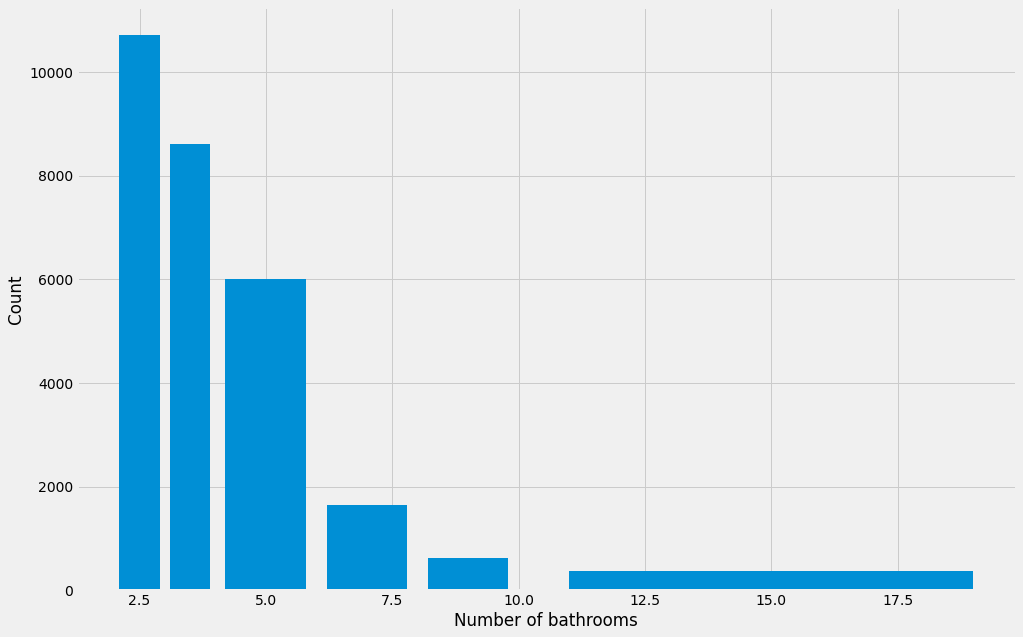

In [483]:
bins=[2, 3, 4, 6, 8, 10, 20]
plt.hist(df7.bath, rwidth=0.8, bins=bins)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [486]:
dummies = pd.get_dummies(df5.location)
df7 = pd.concat([df5, dummies.drop(['other'], axis='columns')], 
                 axis='columns')

In [485]:
df8 = df7.drop(['location', 'price_per_sqft', 'price_sqft_cat', 'price_sqft_cat2'], axis='columns')

### Histogram 2
This histogram shows the distribution of lot acreage.  As can be seen most homes have less than 10 acres of lot. The higher the lot acreage, the less often it appears. Homes that have 300 acres or more belong to the minority group. 

Text(0.5, 0, 'Acre Lot Size')

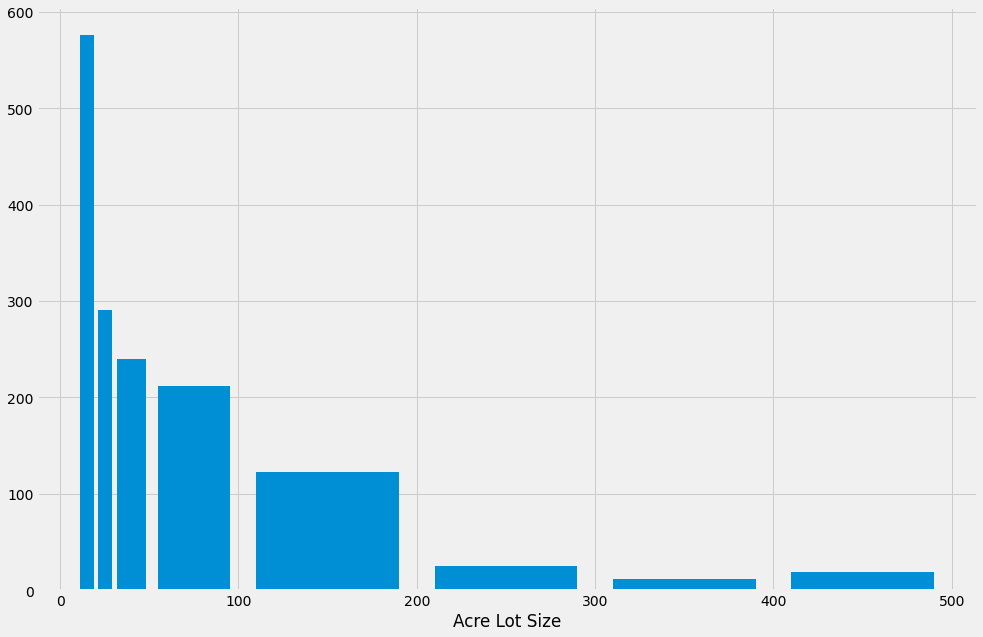

In [487]:
plt.hist(df10.acre_lot,  rwidth=0.8, bins=[10, 20, 30, 50, 100, 200, 300, 400, 500])
plt.xlabel("Acre Lot Size")

In [488]:
df10 = df8.dropna()

In [489]:
# remove price the outcome variable, retain only independent variables
IV = df10.drop('price', axis='columns')
DV = df10.price

# Prediction Model

The dataset was split using 80/20 split. The model is first trained on 80% random sample of the data.  Then the K-fold cross-validation was conducted to determine the validty of the tested model.  Finally, linear regression is compared against Lasso regression and decision tree regression. The linear regression was chosen due to its superior scores and overall fit of the subject. 

In [490]:
from sklearn.model_selection import train_test_split
IV_train,IV_test, DV_train, DV_test = train_test_split(IV, DV, test_size=0.2, random_state=30)

In [491]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# model is trained
lr.fit(IV_train, DV_train);
# evaluate the scores of the model
lr.score(IV_test, DV_test);

0.7089429659043417

In [492]:
# this following code was commented out for speed considerations, but could be uncommented to validate code

# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=30)
# cross_val_score(LinearRegression(), IV, DV, cv=cv)

In [454]:
# this following code was commented out for speed considerations, but could be uncommented to validate code

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# def find_best_model(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': model,
#             'params': {
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         }
 
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model(IV,DV)

,model,best_score,best_params
0,linear_regression,0.65692,{}
1,lasso,0.65692,"{'alpha': 1, 'selection': 'random'}"


In [493]:
def predict_price(location, sqft, bath, bedroom, balcony, acre_lot):
    loc_index = np.where(IV.columns==location)[0][0]
    
    x = np.zeros(len(IV.columns))
    x[0] = bedroom
    x[1] = bath
    x[2] = balcony
    x[3] = acre_lot
    x[4] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

## Price Prediction Model
Modify the following parameters and then click on 'Predict Home Prices' to obtain a price estimate

In [494]:

my_interact_manual = interact_manual.options(manual_name="Predict Home Prices")

my_interact_manual(predict_price, location=['Boston', 'New York City', 'Providence', 'Waterbury', 'Warwick', 'Manchester', 
                                  'Bridgeport', 'Hartford', 'Springfield', 'Bristol', 'Cranston', 'Newton', 
                                 'Worcester', 'Pittsfield', 'San Juan', 'West Hartford'], 
                    bedroom=widgets.IntSlider(min=1, max=9, step=1, value=2), 
                    sqft=widgets.IntSlider(min=300, max=40720, step=100, value=4000), 
                    bath=widgets.IntSlider(min=1, max=9, step=1, value=2), 
                   acre_lot=widgets.IntSlider(min=0, max=9999, step=100, value=2), 
                   balcony=widgets.IntSlider(min=0, max=99, step=1, value=2))

interactive(children=(Dropdown(description='location', options=('Boston', 'New York City', 'Providence', 'Wate…

<function __main__.predict_price(location, sqft, bath, bedroom, balcony, acre_lot)>

## Accuracy of the Model

$R^2$ measures how much variation can be explained by the model. The higher, the better. 

In [495]:
from sklearn.metrics import r2_score
lm = lr.fit(IV_train, DV_train)
DV_pred = lm.predict(IV_test)
print('R-Square:', r2_score(DV_test, DV_pred))

R-Square: 0.7089429659043417


The closer the normalized RMSE is to zero, the more accurate the model

In [496]:
from sklearn.metrics import mean_squared_error as MSE
mse_dt = MSE(DV_test, DV_pred)
rmse_dt = mse_dt **(1/2)
print('normalized RMSE', rmse_dt/(max(DV_test)-min(DV_test)))

normalized RMSE 0.03131322679911365
